In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [1]:
import pandas as pd
df= pd.read_excel(r'PATH')
type_sample = pd.read_excel('PATH', sheet_name='Data_4')
demographic = pd.read_excel('PATH', sheet_name='Demographic_data_2')
demographic = demographic[['Sample', 'Edad', 'Sex']].dropna()
type_sample = type_sample[['Sample', 'Disease']]
df = pd.merge(pd.merge(df, type_sample, on='Sample', how='inner'), demographic, on='Sample', how='inner')
df.set_index('Sample', inplace=True)
df['Disease_2'] = df['Disease'].apply(lambda x: 'Control' if x == 'C' else 'Parkinson')
df = df.rename(columns={'Disease_2': 'Group'})
print(df)
# df.to_excel("datos_no_standarizados.xlsx")

               C0  C3-DC (C4-OH)        C9     C12:1    Ac-Orn  Putrescine  \
Sample                                                                       
c1       6.744444       0.008217  0.012667  0.037000  0.263222    0.170111   
c2       7.400000       0.008217  0.011000  0.045367  0.051333    0.154000   
c3       7.733333       0.008217  0.012450  0.037000  0.260667    0.118333   
c4       7.466667       0.008217  0.010667  0.046000  0.241667    0.120667   
c5       7.800000       0.008217  0.014333  0.037000  0.366667    0.131667   
c6       8.466667       0.008333  0.011000  0.047000  0.613333    0.098000   
c7       3.400000       0.008217  0.012783  0.047421  0.157000    0.070333   
c8       9.533333       0.008900  0.011000  0.038667  0.291333    0.092000   
c9      14.083333       0.010500  0.010667  0.050500  0.303500    0.151167   
c10     10.033333       0.006500  0.011333  0.038333  0.255167    0.185167   
c11      5.727273       0.008217  0.012783  0.047273  0.135000  

0.88 ['Control' 'Control' 'Control' 'Control' 'Control' 'Control' 'Control'
 'Control' 'Control' 'Control' 'Control' 'Control' 'Control' 'Parkinson'
 'Control' 'Control' 'Control' 'Control' 'Parkinson' 'Parkinson'
 'Parkinson' 'Parkinson' 'Control' 'Control' 'Parkinson']
Index(['C0', 'C3-DC (C4-OH)', 'C9', 'C12:1', 'Ac-Orn', 'Putrescine', 'SDMA',
       'Spermidine', 'Edad', 'Sex'],
      dtype='object')

 [[-4.30922647  0.26126115  3.63004725  0.57487787 -0.19973728  4.53463127
   0.91776371 -0.37999973  6.45309192 -5.45841536]] 
 [-2.00334435] 
 [1.] 
 [[-0.25072573 -0.35313313 -0.3070117  -0.29817136 -0.24589514 -0.33718841
  -0.26357306 -0.32209464 -0.45740183  0.72222222]
 [ 0.6447233   0.90805662  0.78945867  0.76672635  0.63230178  0.8670559
   0.67775929  0.82824335  1.17617612  0.28571429]]
[-12.52266266 -12.92787236 -13.10864132  -6.87518017 -15.69957669
  -8.25517076  -6.33348262 -17.3533105  -15.07565473 -14.65323377
 -13.38763916  -6.52192437 -16.74437569  -4.13625073  -6.

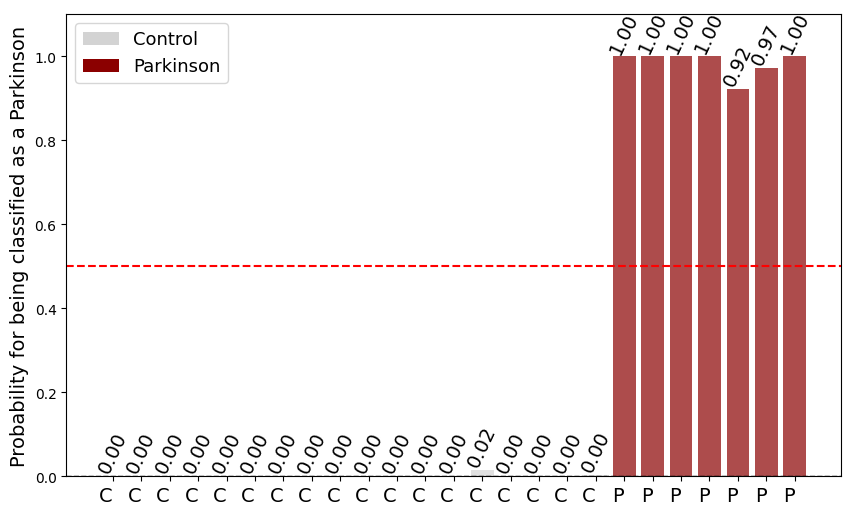

LDA score:  1.0


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.utils import resample

indexes = df['Disease'].apply(lambda x: 'P' if x.startswith('P') else 'C')

X = df.drop(['Group', 'Disease'], axis=1) 
# Normalize all data, except sex parameter
X[X.columns.difference(['Sex'])] = X[X.columns.difference(['Sex'])].apply(lambda x: (x - x.mean()) / x.std())
y = df['Group']  # Etiquetas (control/parkinson)

# Initialize model
lda = LinearDiscriminantAnalysis()

leave_val=LeaveOneOut()
mod_score2=cross_val_score(lda,X,y,cv=leave_val)
predictions = cross_val_predict(lda, X, y, cv=leave_val)
print(np.mean(mod_score2), predictions)

# Train model with preprocessed data
lda.fit(X, y)

# Get scores
scores = lda.decision_function(X)

# Get probabilities of each sample to be from each group 
prob = lda.predict_proba(X)
prob_pd = prob[:, 1] #Get PD probailities of each sample
print(X.columns)
print("\n",lda.coef_,"\n", lda.intercept_,"\n", lda.explained_variance_ratio_,"\n", lda.means_)
print(scores, lda.predict(X))
coef = lda.coef_
intercept = lda.intercept_

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(prob_pd)), prob_pd, color=colors, alpha=0.7)
for bar, value in zip(bars, prob_pd):
    plt.text(bar.get_x() + bar.get_width() / 2, value, '{:.2f}'.format(value),
             ha='center', va='bottom', rotation=65, fontsize=14)

plt.axhline(0, color='black', linestyle='--', linewidth=1)
# plt.xlabel('Sample')
plt.ylabel('Probability for being classified as a Parkinson', fontsize=14)
# plt.title('Probability of each sample for being Parkinson')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.xticks(ticks=range(len(prob_pd)), labels=indexes, ha='right', fontsize=14)

control_patch = plt.Rectangle((0,0),1,1,fc="lightgrey", edgecolor = 'none')
parkinson_patch = plt.Rectangle((0,0),1,1,fc="darkred", edgecolor = 'none')
plt.legend([control_patch, parkinson_patch], ['Control', 'Parkinson'], fontsize=13)
plt.ylim(0, max(prob_pd) + 0.1)
plt.savefig('LDA_with_demographic.png', dpi=300, format='png')
plt.show()

# Classifying score of this LDA
print("LDA score: ", lda.score(X, y))


0.8
Index(['C0', 'C3-DC (C4-OH)', 'C9', 'C12:1', 'Ac-Orn', 'Putrescine', 'SDMA',
       'Spermidine'],
      dtype='object')

 [[-1.38443542  0.80607783  2.69648823  1.98051583  1.02677225  3.85699643
   0.57982935 -1.0897593 ]] 
 [-3.07434471] 
 [1.] 
 [[-0.25072573 -0.35313313 -0.3070117  -0.29817136 -0.24589514 -0.33718841
  -0.26357306 -0.32209464]
 [ 0.6447233   0.90805662  0.78945867  0.76672635  0.63230178  0.8670559
   0.67775929  0.82824335]]
[ -5.43522162  -6.44213629  -8.6880327   -8.02897611  -4.89864618
  -5.7157465   -6.69076695 -10.95329325  -7.02915836  -8.74037478
  -5.35998675  -6.75751826  -8.87962641  -1.03018173  -2.88307441
  -1.89546029  -6.18924064   1.48555093   2.7030524    4.96438401
   5.78587434   9.34135024   0.40924618   0.40861391   3.66075151] ['Control' 'Control' 'Control' 'Control' 'Control' 'Control' 'Control'
 'Control' 'Control' 'Control' 'Control' 'Control' 'Control' 'Control'
 'Control' 'Control' 'Control' 'Parkinson' 'Parkinson' 'Parkinson'
 'Pa

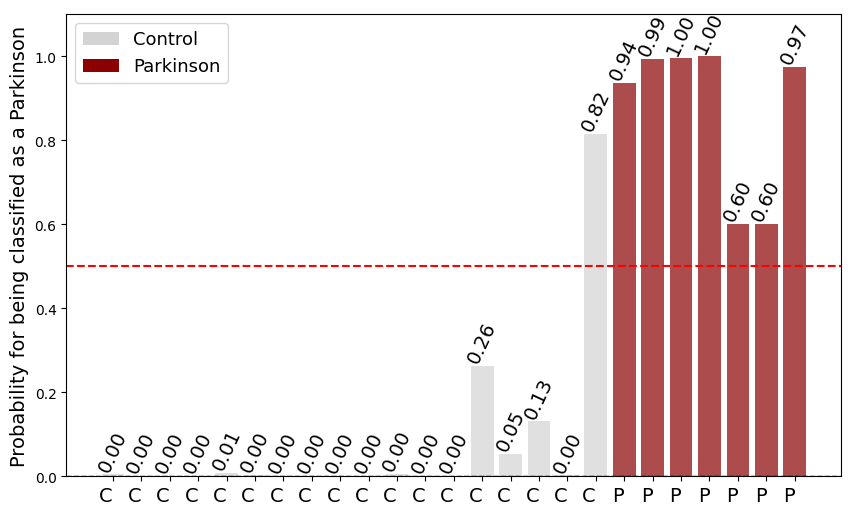

LDA score:  0.96


In [5]:
# Same LDA, WITHOUT DEMOGRAPHIC DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
indexes = df['Disease'].apply(lambda x: 'P' if x.startswith('P') else 'C')

X = df.drop(['Group', 'Disease','Edad', 'Sex'], axis=1)
# Normalize all data
X= (X-X.mean())/X.std()
y = df['Group'] 

# Initialize model
lda = LinearDiscriminantAnalysis()

# Train model with preprocessed data
lda.fit(X, y)

leave_val=LeaveOneOut()
mod_score2=cross_val_score(lda,X,y,cv=leave_val)
print(np.mean(mod_score2))
print(X.columns)
print("\n",lda.coef_,"\n", lda.intercept_,"\n", lda.explained_variance_ratio_,"\n", lda.means_)

# Get scores
scores = lda.decision_function(X)
print(scores, lda.predict(X))

# Get probabilities of each sample to be from each group 
prob = lda.predict_proba(X)
prob_pd = prob[:, 1] #Get PD probailities of each sample

# Map each group with a colour
colors = np.array(['lightgrey' if label == 'Control' else 'darkred' for label in y])

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(prob_pd)), prob_pd, color=colors, alpha=0.7)
for bar, value in zip(bars, prob_pd):
    plt.text(bar.get_x() + bar.get_width() / 2, value, '{:.2f}'.format(value),
             ha='center', va='bottom', rotation=65, fontsize=14)

plt.axhline(0, color='black', linestyle='--', linewidth=1)
# plt.xlabel('Sample')
plt.ylabel('Probability for being classified as a Parkinson', fontsize=14)
# plt.title('Probability of each sample for being Parkinson')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.xticks(ticks=range(len(prob_pd)), labels=indexes, ha='right', fontsize=14)

control_patch = plt.Rectangle((0,0),1,1,fc="lightgrey", edgecolor = 'none')
parkinson_patch = plt.Rectangle((0,0),1,1,fc="darkred", edgecolor = 'none')
plt.legend([control_patch, parkinson_patch], ['Control', 'Parkinson'], fontsize=13)
plt.ylim(0, max(prob_pd) + 0.1)
plt.savefig('LDA_without_demographic.png', dpi=300, format='png')
plt.show()

# Classifying score of this LDA
print("LDA score: ", lda.score(X, y))